# 01-순환 신경망 (Recurrent Neural Network, RNN)

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

hidden_units = 128
timesteps = 100
input_dim = 3


model = Sequential()
model.add(SimpleRNN(3, input_shape=(2, 10))) # 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [3]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8, 2, 10))) # batch_size, input_length(timesteps), input_dim
model.summary() # batch_size, output_dim

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (8, 3)                    42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [5]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8, 2, 10), return_sequences=True)) 
# batch_size, input_length(timesteps), input_dim(단어 벡터의 차원)
model.summary() # batch_size, input_length, output_dim

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (8, 2, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


# 02-장단기 메모리 (Long Short-Term Memory, LSTM)

장기 의존성 문제 (the problem of Long-Term Dependencies)

# 03-게이트 순환 유닛 (Gated Recurrent Unit, GRU)

In [14]:
from tensorflow.keras.layers import GRU
from tensorflow.keras.models import Sequential

hidden_size = 10
timesteps = 10
input_dim = 3

# 3 x 10 + 10 + 10 * 10 = 140 -> SimpleRNN
# GRU , 게이트 params 개수 추가해줘야 됨

model = Sequential()
model.add(GRU(hidden_size, input_shape=(timesteps, input_dim)))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 10)                450       
                                                                 
Total params: 450
Trainable params: 450
Non-trainable params: 0
_________________________________________________________________


# 04-케라스의 SimpleRNN과 LSTM 이해하기

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, LSTM, Bidirectional

train_X = [[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5,
2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]
print(np.shape(train_X))

(4, 5)


In [17]:
train_X = [[[0.1, 4.2, 1.5, 1.1, 2.8], [1.0, 3.1, 2.5, 0.7, 1.1], [0.3, 2.1, 1.5,
2.1, 0.1], [2.2, 1.4, 0.5, 0.9, 1.1]]]
train_X = np.array(train_X, dtype=np.float32)
print(train_X.shape)

(1, 4, 5)


In [18]:
rnn = SimpleRNN(3)
hidden_state = rnn(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))

hidden state : [[ 0.00543029 -0.9589752  -0.11370576]], shape: (1, 3)


In [23]:
rnn = SimpleRNN(3, return_sequences=True)
hidden_state = rnn(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))

hidden state : [[[ 0.4860671  -0.3600892   0.9999973 ]
  [-0.89198697 -0.00982944  0.99997556]
  [-0.28485563 -0.737735    0.997643  ]
  [ 0.76006407  0.45950657  0.97987604]]], shape: (1, 4, 3)


In [27]:
rnn = SimpleRNN(3, return_sequences=True, return_state=True)
hidden_states, last_state = rnn(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))

hidden states : [[[-0.13664734  0.90197337  0.99983746]
  [-0.34359074  0.8098156   0.9949661 ]
  [ 0.53233576 -0.29509205  0.29998806]
  [-0.9248585  -0.9593232   0.9725801 ]]], shape: (1, 4, 3)
last hidden state : [[-0.9248585 -0.9593232  0.9725801]], shape: (1, 3)


In [28]:
lstm = LSTM(3, return_sequences=False, return_state=True)

hidden_state, last_state, last_cell_state = lstm(train_X)

print('hidden state : {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('last hidden state : {}, shape: {}'.format(last_state, last_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.
shape))

hidden state : [[ 0.10579669 -0.10569224 -0.2552316 ]], shape: (1, 3)
last hidden state : [[ 0.10579669 -0.10569224 -0.2552316 ]], shape: (1, 3)
last cell state : [[ 0.6434901  -0.17089057 -0.39580116]], shape: (1, 3)


In [29]:
lstm = LSTM(3, return_sequences=True, return_state=True)
hidden_states, last_hidden_state, last_cell_state = lstm(train_X)
print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('last hidden state : {}, shape: {}'.format(last_hidden_state,
last_hidden_state.shape))
print('last cell state : {}, shape: {}'.format(last_cell_state, last_cell_state.
shape))

hidden states : [[[0.23962617 0.02055499 0.03025163]
  [0.50783145 0.10866491 0.097845  ]
  [0.57100165 0.14253806 0.16409256]
  [0.4270816  0.13077904 0.18208344]]], shape: (1, 4, 3)
last hidden state : [[0.4270816  0.13077904 0.18208344]], shape: (1, 3)
last cell state : [[0.5049217  0.40734798 0.30246925]], shape: (1, 3)


In [32]:
k_init = tf.keras.initializers.Constant(value=0.1)
b_init = tf.keras.initializers.Constant(value=0)
r_init = tf.keras.initializers.Constant(value=0.1)

In [37]:
bilstm = Bidirectional(LSTM(3, 
                            return_sequences=False, 
                            return_state=True, 
                            kernel_initializer=k_init,
                            bias_initializer=b_init,
                            recurrent_initializer=r_init
                            ))
hidden_state, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_state, hidden_state.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

hidden states : [[0.63031393 0.63031393 0.63031393 0.7038734  0.7038734  0.7038734 ]], shape: (1, 6)
forward state : [[0.63031393 0.63031393 0.63031393]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


In [39]:
bilstm = Bidirectional(LSTM(3, 
                            return_sequences=True, 
                            return_state=True, 
                            kernel_initializer=k_init,
                            bias_initializer=b_init,
                            recurrent_initializer=r_init
                            ))

hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

print('hidden states : {}, shape: {}'.format(hidden_states, hidden_states.shape))
print('forward state : {}, shape: {}'.format(forward_h, forward_h.shape))
print('backward state : {}, shape: {}'.format(backward_h, backward_h.shape))

hidden states : [[[0.35906473 0.35906473 0.35906473 0.7038734  0.7038734  0.7038734 ]
  [0.5511133  0.5511133  0.5511133  0.58863586 0.58863586 0.58863586]
  [0.59115756 0.59115756 0.59115756 0.3951699  0.3951699  0.3951699 ]
  [0.63031393 0.63031393 0.63031393 0.21942244 0.21942244 0.21942244]]], shape: (1, 4, 6)
forward state : [[0.63031393 0.63031393 0.63031393]], shape: (1, 3)
backward state : [[0.7038734 0.7038734 0.7038734]], shape: (1, 3)


# 05-RNN 언어모델 (Recurrent Neural Network Language Model, RNNLM)

교사 강요.   
원래 언어모델은 입력값 -> 출력값 -> 입력값, t 시점의 출력값이 t+1의 입력값으로 사용되나,  
훈련시에는 정답 레이블을 이용해 t+1의 입력값을 입력해줌.

# 06-RNN을 이용한 텍스트 생성 (Text Generation using RNN)

SimpleRNN

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [2]:
text = """경마장에 있는 말이 뛰고 있다\n그의 말이 법이다\n가는 말이 고와야 오는 말이 곱다 \n"""
print(text)

경마장에 있는 말이 뛰고 있다
그의 말이 법이다
가는 말이 고와야 오는 말이 곱다 



In [3]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
vocab_size = len(tokenizer.word_index) + 1
print('단 어 집 합 의 크 기 : %d' % vocab_size)

단 어 집 합 의 크 기 : 12


In [4]:
tokenizer.word_index

{'말이': 1,
 '경마장에': 2,
 '있는': 3,
 '뛰고': 4,
 '있다': 5,
 '그의': 6,
 '법이다': 7,
 '가는': 8,
 '고와야': 9,
 '오는': 10,
 '곱다': 11}

In [5]:
sequences = list()

for line in text.split('\n'):
  encoded = tokenizer.texts_to_sequences([line])[0]
  print(encoded)
  for i in range(1, len(encoded)):
    sequence = encoded[:i+1]
    sequences.append(sequence)
    
print('학 습 에 사 용 할 샘 플 의 개 수: %d' % len(sequences))

[2, 3, 1, 4, 5]
[6, 1, 7]
[8, 1, 9, 10, 1, 11]
[]
학 습 에 사 용 할 샘 플 의 개 수: 11


In [6]:
sequences

[[2, 3],
 [2, 3, 1],
 [2, 3, 1, 4],
 [2, 3, 1, 4, 5],
 [6, 1],
 [6, 1, 7],
 [8, 1],
 [8, 1, 9],
 [8, 1, 9, 10],
 [8, 1, 9, 10, 1],
 [8, 1, 9, 10, 1, 11]]

In [7]:
max_len = max(len(l) for l in sequences) 

print('샘 플 의 최 대 길 이 : {}'.format(max_len))

샘 플 의 최 대 길 이 : 6


In [8]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
sequences

array([[ 0,  0,  0,  0,  2,  3],
       [ 0,  0,  0,  2,  3,  1],
       [ 0,  0,  2,  3,  1,  4],
       [ 0,  2,  3,  1,  4,  5],
       [ 0,  0,  0,  0,  6,  1],
       [ 0,  0,  0,  6,  1,  7],
       [ 0,  0,  0,  0,  8,  1],
       [ 0,  0,  0,  8,  1,  9],
       [ 0,  0,  8,  1,  9, 10],
       [ 0,  8,  1,  9, 10,  1],
       [ 8,  1,  9, 10,  1, 11]])

In [9]:
sequences = np.array(sequences)
X = sequences[:, :-1]
y = sequences[:, -1]
print(X)
print(y)

[[ 0  0  0  0  2]
 [ 0  0  0  2  3]
 [ 0  0  2  3  1]
 [ 0  2  3  1  4]
 [ 0  0  0  0  6]
 [ 0  0  0  6  1]
 [ 0  0  0  0  8]
 [ 0  0  0  8  1]
 [ 0  0  8  1  9]
 [ 0  8  1  9 10]
 [ 8  1  9 10  1]]
[ 3  1  4  5  1  7  1  9 10  1 11]


In [10]:
y = to_categorical(y, num_classes=vocab_size)
y

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

In [12]:
embedding_dim = 10
hidden_units = 32

model = Sequential()

model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 10)          120       
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1376      
                                                                 
 dense (Dense)               (None, 12)                396       
                                                                 
Total params: 1,892
Trainable params: 1,892
Non-trainable params: 0
_________________________________________________________________


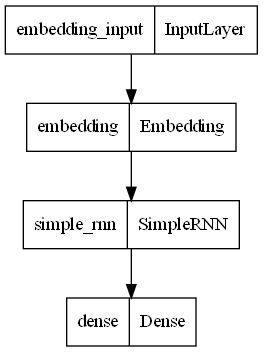

In [15]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [16]:
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
1/1 - 1s - loss: 2.4891 - accuracy: 0.0000e+00 - 1s/epoch - 1s/step
Epoch 2/200
1/1 - 0s - loss: 2.4739 - accuracy: 0.0000e+00 - 4ms/epoch - 4ms/step
Epoch 3/200
1/1 - 0s - loss: 2.4589 - accuracy: 0.0000e+00 - 4ms/epoch - 4ms/step
Epoch 4/200
1/1 - 0s - loss: 2.4440 - accuracy: 0.3636 - 6ms/epoch - 6ms/step
Epoch 5/200
1/1 - 0s - loss: 2.4290 - accuracy: 0.3636 - 5ms/epoch - 5ms/step
Epoch 6/200
1/1 - 0s - loss: 2.4137 - accuracy: 0.3636 - 5ms/epoch - 5ms/step
Epoch 7/200
1/1 - 0s - loss: 2.3981 - accuracy: 0.3636 - 5ms/epoch - 5ms/step
Epoch 8/200
1/1 - 0s - loss: 2.3819 - accuracy: 0.4545 - 5ms/epoch - 5ms/step
Epoch 9/200
1/1 - 0s - loss: 2.3651 - accuracy: 0.4545 - 5ms/epoch - 5ms/step
Epoch 10/200
1/1 - 0s - loss: 2.3475 - accuracy: 0.4545 - 5ms/epoch - 5ms/step
Epoch 11/200
1/1 - 0s - loss: 2.3290 - accuracy: 0.3636 - 5ms/epoch - 5ms/step
Epoch 12/200
1/1 - 0s - loss: 2.3096 - accuracy: 0.3636 - 4ms/epoch - 4ms/step
Epoch 13/200
1/1 - 0s - loss: 2.2891 - accuracy: 0.

In [44]:
word_to_id = tokenizer.word_index
id_to_word = dict((v, k) for k, v in word_to_id.items())

def sentence_generation(model, tokenizer, current_word, n): 
  init_word = current_word
  sentence = ''
  
  # n번 반 복
  for _ in range(n):
    # 현 재 단 어 에 대 한 정 수 인 코 딩 과 패 딩
    encoded = tokenizer.texts_to_sequences([current_word])[0]
    encoded = pad_sequences([encoded], maxlen=5, padding='pre')
    # 입 력 한 X(현 재 단 어)에 대 해 서 Y를 예 측 하 고 Y(예 측 한 단 어)를 result에 저 장
    result = model.predict(encoded, verbose=0)
    result = np.argmax(result, axis=1)

    word = id_to_word[result[0]]    
    
    current_word = current_word + ' ' + word
      
    # 예 측 단 어 를 문 장 에 저 장
    sentence = sentence + ' ' + word
      
  sentence = init_word + sentence
  
  return sentence

In [45]:
print(sentence_generation(model, tokenizer, '경마장에', 4))

경마장에 있는 말이 뛰고 있다


In [46]:
print(sentence_generation(model, tokenizer, '그 의', 2))

그 의 말이 있는


In [47]:
print(sentence_generation(model, tokenizer, '가 는', 5))

가 는 말이 있는 말이 뛰고 있다


LSTM

In [49]:
import pandas as pd
import numpy as np
from string import punctuation

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [56]:
df = pd.read_csv('data/archive/ArticlesApril2018.csv')
df.head()

,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,5adf6684068401528a2aa69b,781,By JOHN BRANCH,article,Former N.F.L. Cheerleaders’ Settlement Offer: ...,"['Workplace Hazards and Violations', 'Football...",68,Sports,0,2018-04-24 17:16:49,Pro Football,"“I understand that they could meet with us, pa...",The New York Times,News,https://www.nytimes.com/2018/04/24/sports/foot...
1,5adf653f068401528a2aa697,656,By LISA FRIEDMAN,article,E.P.A. to Unveil a New Rule. Its Effect: Less ...,"['Environmental Protection Agency', 'Pruitt, S...",68,Climate,0,2018-04-24 17:11:21,Unknown,The agency plans to publish a new regulation T...,The New York Times,News,https://www.nytimes.com/2018/04/24/climate/epa...
2,5adf4626068401528a2aa628,2427,By PETE WELLS,article,"The New Noma, Explained","['Restaurants', 'Noma (Copenhagen, Restaurant)...",66,Dining,0,2018-04-24 14:58:44,Unknown,What’s it like to eat at the second incarnatio...,The New York Times,News,https://www.nytimes.com/2018/04/24/dining/noma...
3,5adf40d2068401528a2aa619,626,By JULIE HIRSCHFELD DAVIS and PETER BAKER,article,Unknown,"['Macron, Emmanuel (1977- )', 'Trump, Donald J...",68,Washington,0,2018-04-24 14:35:57,Europe,President Trump welcomed President Emmanuel Ma...,The New York Times,News,https://www.nytimes.com/2018/04/24/world/europ...
4,5adf3d64068401528a2aa60f,815,By IAN AUSTEN and DAN BILEFSKY,article,Unknown,"['Toronto, Ontario, Attack (April, 2018)', 'Mu...",68,Foreign,0,2018-04-24 14:21:21,Canada,"Alek Minassian, 25, a resident of Toronto’s Ri...",The New York Times,News,https://www.nytimes.com/2018/04/24/world/canad...


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   articleID         1324 non-null   object
 1   articleWordCount  1324 non-null   int64 
 2   byline            1324 non-null   object
 3   documentType      1324 non-null   object
 4   headline          1324 non-null   object
 5   keywords          1324 non-null   object
 6   multimedia        1324 non-null   int64 
 7   newDesk           1324 non-null   object
 8   printPage         1324 non-null   int64 
 9   pubDate           1324 non-null   object
 10  sectionName       1324 non-null   object
 11  snippet           1324 non-null   object
 12  source            1324 non-null   object
 13  typeOfMaterial    1324 non-null   object
 14  webURL            1324 non-null   object
dtypes: int64(3), object(12)
memory usage: 155.3+ KB


In [57]:
headline = []

headline.extend(list(df.headline.values))
headline[:5]

['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'Unknown',
 'Unknown']

In [61]:
headline = [word for word in headline if word != 'Unknown']
print(len(headline))
headline[:5]

1214


['Former N.F.L. Cheerleaders’ Settlement Offer: $1 and a Meeting With Goodell',
 'E.P.A. to Unveil a New Rule. Its Effect: Less Science in Policymaking.',
 'The New Noma, Explained',
 'How a Bag of Texas Dirt  Became a Times Tradition',
 'Is School a Place for Self-Expression?']

In [60]:
def repreprocessing(raw_sentence):
    preproceseed_sentence = raw_sentence.encode("utf8").decode("ascii",'ignore')
    # 구두점 제거와 동시에 소문자화
    return ''.join(word for word in preproceseed_sentence if word not in punctuation).lower()

preprocessed_headline = [repreprocessing(x) for x in headline]
preprocessed_headline[:5]

['former nfl cheerleaders settlement offer 1 and a meeting with goodell',
 'epa to unveil a new rule its effect less science in policymaking',
 'the new noma explained',
 'how a bag of texas dirt  became a times tradition',
 'is school a place for selfexpression']

In [62]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_headline)
vocab_size = len(tokenizer.word_index) + 1
print('단어 집합의 크기 : %d' % vocab_size)

단어 집합의 크기 : 3494


In [63]:
sequences = list()

for sentence in preprocessed_headline:

    # 각 샘플에 대한 정수 인코딩
    encoded = tokenizer.texts_to_sequences([sentence])[0] 
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

print(len(sequences))
sequences[:11]

7803


[[99, 269],
 [99, 269, 371],
 [99, 269, 371, 1115],
 [99, 269, 371, 1115, 582],
 [99, 269, 371, 1115, 582, 52],
 [99, 269, 371, 1115, 582, 52, 7],
 [99, 269, 371, 1115, 582, 52, 7, 2],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10],
 [99, 269, 371, 1115, 582, 52, 7, 2, 372, 10, 1116],
 [100, 3]]

In [64]:
word_to_id = tokenizer.word_index
id_to_word = dict((v, k) for k, v in word_to_id.items())

In [65]:
print('빈도수 상위 582번 단어 : {}'.format(id_to_word[582]))

빈도수 상위 582번 단어 : offer


In [67]:
id_to_word[1]

'the'

In [68]:
max_len = max(len(l) for l in sequences)
print('샘플의 최대 길이 : {}'.format(max_len))

샘플의 최대 길이 : 24


In [69]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')
print(sequences[:3])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0   99  269]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0   99  269  371]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0   99  269  371 1115]]


In [70]:
sequences = np.array(sequences)
X = sequences[:,:-1]
y = sequences[:,-1]

In [73]:
X[:3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,  99],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,  99, 269],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  99, 269, 371]])

In [71]:
y = to_categorical(y, num_classes=vocab_size)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM

embedding_dim = 10
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 10)          34940     
                                                                 
 lstm (LSTM)                 (None, 128)               71168     
                                                                 
 dense_1 (Dense)             (None, 3494)              450726    
                                                                 
Total params: 556,834
Trainable params: 556,834
Non-trainable params: 0
_________________________________________________________________


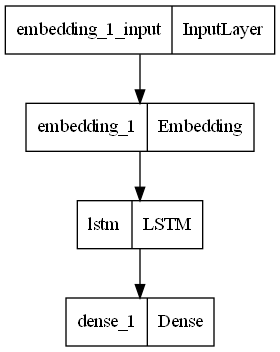

In [75]:
plot_model(model)

In [76]:
model.fit(X, y, epochs=200, verbose=2)

Epoch 1/200
244/244 - 6s - loss: 7.6560 - accuracy: 0.0277 - 6s/epoch - 26ms/step
Epoch 2/200
244/244 - 4s - loss: 7.1219 - accuracy: 0.0302 - 4s/epoch - 17ms/step
Epoch 3/200
244/244 - 4s - loss: 6.9786 - accuracy: 0.0379 - 4s/epoch - 17ms/step
Epoch 4/200
244/244 - 4s - loss: 6.8543 - accuracy: 0.0433 - 4s/epoch - 17ms/step
Epoch 5/200
244/244 - 4s - loss: 6.7033 - accuracy: 0.0446 - 4s/epoch - 16ms/step
Epoch 6/200
244/244 - 6s - loss: 6.5307 - accuracy: 0.0468 - 6s/epoch - 23ms/step
Epoch 7/200
244/244 - 5s - loss: 6.3434 - accuracy: 0.0525 - 5s/epoch - 21ms/step
Epoch 8/200
244/244 - 5s - loss: 6.1434 - accuracy: 0.0592 - 5s/epoch - 19ms/step
Epoch 9/200
244/244 - 4s - loss: 5.9497 - accuracy: 0.0616 - 4s/epoch - 18ms/step
Epoch 10/200
244/244 - 4s - loss: 5.7685 - accuracy: 0.0636 - 4s/epoch - 17ms/step
Epoch 11/200
244/244 - 4s - loss: 5.5943 - accuracy: 0.0736 - 4s/epoch - 17ms/step
Epoch 12/200
244/244 - 4s - loss: 5.4327 - accuracy: 0.0751 - 4s/epoch - 18ms/step
Epoch 13/200


In [79]:
print(sentence_generation(model, tokenizer, 'i', 10))
print(sentence_generation(model, tokenizer, 'how', 10))

i care on gaza dignity are being now yet friends state
how a lot for furor invitation missing national leaders to courtroom


07-문자 단위 RNN(Char RNN)

In [78]:
import numpy as np
import urllib.request
from tensorflow.keras.utils import to_categorical
# 데 이 터 로 드
urllib.request.urlretrieve("http://www.gutenberg.org/files/11/11-0.txt", filename=
"11-0.txt")
f = open('11-0.txt', 'rb')
sentences = []
for sentence in f: # 데 이 터 로 부 터 한 줄 씩 읽 는 다.
  sentence = sentence.strip() # strip()을 통 해 \r, \n을 제 거 한 다.
  sentence = sentence.lower() # 소 문 자 화.
  sentence = sentence.decode('ascii', 'ignore') # \xe2\x80\x99 등 과 같 은 바 이 트
  if len(sentence) > 0:
    sentences.append(sentence)
f.close()

In [80]:
sentences[:5]

['the project gutenberg ebook of alices adventures in wonderland, by lewis carroll',
 'this ebook is for the use of anyone anywhere in the united states and',
 'most other parts of the world at no cost and with almost no restrictions',
 'whatsoever. you may copy it, give it away or re-use it under the terms',
 'of the project gutenberg license included with this ebook or online at']

In [84]:
total_data = ' '.join(sentences)
len(total_data)

159484

In [85]:
char_vocab = sorted(list(set(total_data)))
vocab_size = len(char_vocab)
print ('문 자 집 합 의 크 기 : {}'.format(vocab_size))

문 자 집 합 의 크 기 : 56


In [88]:
char_vocab[-10:]

['q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

In [94]:
# 문 자 에 고 유 한 정 수 부 여
char_to_index = dict((char, index) for index, char in enumerate(char_vocab))
index_to_char = dict({v, k} for k, v in char_to_index.items())
print('문 자 집 합 :',char_to_index)
print(index_to_char)

문 자 집 합 : {' ': 0, '!': 1, '"': 2, '#': 3, '$': 4, '%': 5, "'": 6, '(': 7, ')': 8, '*': 9, ',': 10, '-': 11, '.': 12, '/': 13, '0': 14, '1': 15, '2': 16, '3': 17, '4': 18, '5': 19, '6': 20, '7': 21, '8': 22, '9': 23, ':': 24, ';': 25, '?': 26, '[': 27, ']': 28, '_': 29, 'a': 30, 'b': 31, 'c': 32, 'd': 33, 'e': 34, 'f': 35, 'g': 36, 'h': 37, 'i': 38, 'j': 39, 'k': 40, 'l': 41, 'm': 42, 'n': 43, 'o': 44, 'p': 45, 'q': 46, 'r': 47, 's': 48, 't': 49, 'u': 50, 'v': 51, 'w': 52, 'x': 53, 'y': 54, 'z': 55}
{0: ' ', 1: '!', 2: '"', 3: '#', 4: '$', '%': 5, "'": 6, '(': 7, 8: ')', 9: '*', 10: ',', 11: '-', 12: '.', '/': 13, '0': 14, '1': 15, 16: '2', 17: '3', 18: '4', 19: '5', '6': 20, '7': 21, '8': 22, '9': 23, 24: ':', 25: ';', 26: '?', '[': 27, ']': 28, 29: '_', 'a': 30, 'b': 31, 32: 'c', 33: 'd', 34: 'e', 'f': 35, 36: 'g', 'h': 37, 'i': 38, 'j': 39, 40: 'k', 41: 'l', 42: 'm', 'n': 43, 'o': 44, 'p': 45, 'q': 46, 'r': 47, 48: 's', 49: 't', 50: 'u', 'v': 51, 'w': 52, 'x': 53, 'y': 54, 'z': 55}
